In [3]:
### IMPORTS ###
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

In [45]:
#IMPORTS AND DATA PREPARATION
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
def display_results(history, model):
  plt.plot(history.history['accuracy'], label='Train')
  plt.plot(history.history['val_accuracy'], label = 'Test')
  plt.xlabel('Number of Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()
  train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print("Training Accuracy: ", train_acc)
  print("Test Accuracy: ", test_acc)

In [ ]:
########################
##### EXPERIMENT 5 #####
########################

Epoch 1/8
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1033 - accuracy: 0.2226 - val_loss: 1.9471 - val_accuracy: 0.3047
Epoch 2/8
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6238 - accuracy: 0.4121 - val_loss: 1.4692 - val_accuracy: 0.4729
Epoch 3/8
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3504 - accuracy: 0.5159 - val_loss: 1.3013 - val_accuracy: 0.5291
Epoch 4/8
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1219 - accuracy: 0.6003 - val_loss: 1.1674 - val_accuracy: 0.5855
Epoch 5/8
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8968 - accuracy: 0.6809 - val_loss: 1.2658 - val_accuracy: 0.5902
Epoch 6/8
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6819 - accuracy: 0.7570 - val_loss: 1.3237 - val_accuracy: 0.5936
Epoch 7/8
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5061 - accuracy: 0.8234 - val_loss: 1.5199 - val_accuracy: 0.5855

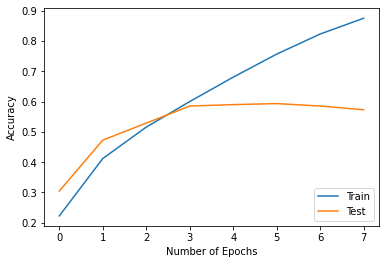

1563/1563 - 2s - loss: 0.2396 - accuracy: 0.9187 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 1.7944 - accuracy: 0.5732 - 424ms/epoch - 1ms/step
Training Accuracy:  0.9186800122261047
Test Accuracy:  0.573199987411499


In [14]:
### CNN WITHOUT MAX POOLING ###
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(10))
sgd = optimizers.SGD(learning_rate=0.1)
model1.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=8, 
                    validation_data=(test_images, test_labels))
display_results(history, model1)

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0338 - accuracy: 0.2576 - val_loss: 1.7583 - val_accuracy: 0.3684
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6473 - accuracy: 0.4063 - val_loss: 1.5225 - val_accuracy: 0.4573
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4765 - accuracy: 0.4677 - val_loss: 1.4162 - val_accuracy: 0.4923
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3692 - accuracy: 0.5075 - val_loss: 1.3556 - val_accuracy: 0.5080
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2811 - accuracy: 0.5409 - val_loss: 1.3146 - val_accuracy: 0.5307
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2058 - accuracy: 0.5717 - val_loss: 1.2531 - val_accuracy: 0.5446
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1343 - accuracy: 0.5989 - val_loss: 1.1845 - val_accuracy:

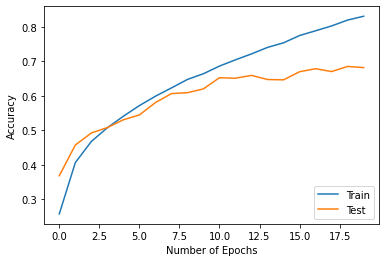

1563/1563 - 2s - loss: 0.4076 - accuracy: 0.8616 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 1.0001 - accuracy: 0.6819 - 362ms/epoch - 1ms/step
Training Accuracy:  0.8615599870681763
Test Accuracy:  0.6819000244140625


In [15]:
### CNN with 2 Max Pooling layers ###
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
#model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(10))
sgd = optimizers.SGD(learning_rate=0.01)
model1.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))
display_results(history, model1)

In [ ]:
########################
##### EXPERIMENT 6 #####
########################

In [71]:
def fully_connected_layers(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x




inputs = tf.keras.layers.Input(shape=(32,32,3))

resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

resnset = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(resize)

fully_connected_layers_output = fully_connected_layers(resnset)
model = tf.keras.Model(inputs=inputs, outputs = fully_connected_layers_output)

sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, 
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])



model = define_compile_model()

for layer in model.layers:
  layer.trainable = False

model.layers[-4].trainable = True
model.layers[-3].trainable = True
model.layers[-2].trainable = True
model.layers[-1].trainable = True

model.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_66 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_37 (UpSamplin  (None, 224, 224, 3)      0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_35  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_50 (Flatten)        (None, 2048)              0         
                                                                 
 dense_126 (Dense)           (None, 512)               104

Epoch 1/3
391/391 [==============================] - 189s 476ms/step - loss: 0.6540 - accuracy: 0.7853 - val_loss: 3.3120 - val_accuracy: 0.1005
Epoch 2/3
391/391 [==============================] - 186s 475ms/step - loss: 0.1847 - accuracy: 0.9391 - val_loss: 1.7413 - val_accuracy: 0.4909
Epoch 3/3
391/391 [==============================] - 186s 475ms/step - loss: 0.0812 - accuracy: 0.9754 - val_loss: 0.2796 - val_accuracy: 0.9100


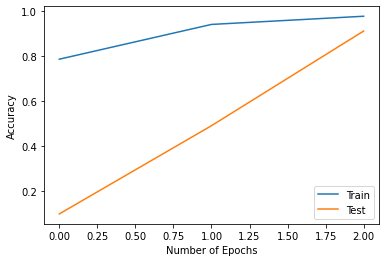

1563/1563 - 52s - loss: 0.1061 - accuracy: 0.9633 - 52s/epoch - 33ms/step
313/313 - 10s - loss: 0.2797 - accuracy: 0.9100 - 10s/epoch - 33ms/step
Training Accuracy:  0.9633399844169617
Test Accuracy:  0.9100000262260437


In [72]:
history = model.fit(train_images, train_labels, epochs=3, validation_data = (test_images, test_labels), batch_size=128)
display_results(history, model)

In [ ]:

########################
##### EXPERIMENT 6 #####
########################


Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.2199 - accuracy: 0.1637 - val_loss: 2.1662 - val_accuracy: 0.1992
Epoch 2/20
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0601 - accuracy: 0.2288 - val_loss: 2.3462 - val_accuracy: 0.1205
Epoch 3/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9318 - accuracy: 0.2700 - val_loss: 2.1108 - val_accuracy: 0.2037
Epoch 4/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8245 - accuracy: 0.3075 - val_loss: 2.1144 - val_accuracy: 0.2230
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7619 - accuracy: 0.3320 - val_loss: 1.9062 - val_accuracy: 0.3066
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7026 - accuracy: 0.3596 - val_loss: 1.7518 - val_accuracy: 0.3638
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6543 - accuracy: 0.3807 - val_loss: 1.7643 - val_accuracy:

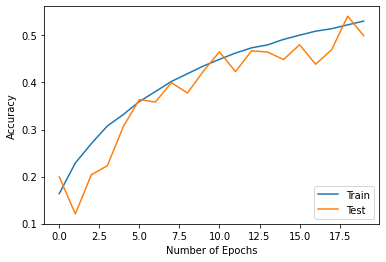

1563/1563 - 2s - loss: 1.3942 - accuracy: 0.5077 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 1.4153 - accuracy: 0.4995 - 366ms/epoch - 1ms/step
Training Accuracy:  0.5076599717140198
Test Accuracy:  0.49950000643730164


In [74]:
### CNN with 0.5 DROPOUT IN FULLY CONNTECT LAYERS AND IN CONVOLUTIONNAL LAYERS ###
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(256, activation='relu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(10))
sgd = optimizers.SGD(learning_rate=0.01)
model1.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))
display_results(history, model1)

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2688 - accuracy: 0.5367 - val_loss: 1.2636 - val_accuracy: 0.5574
Epoch 2/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2538 - accuracy: 0.5463 - val_loss: 1.3814 - val_accuracy: 0.5076
Epoch 3/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2421 - accuracy: 0.5489 - val_loss: 1.3800 - val_accuracy: 0.5269
Epoch 4/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2199 - accuracy: 0.5576 - val_loss: 1.3707 - val_accuracy: 0.5216
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2116 - accuracy: 0.5643 - val_loss: 1.2302 - val_accuracy: 0.5722
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1980 - accuracy: 0.5670 - val_loss: 1.3480 - val_accuracy: 0.5244
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1824 - accuracy: 0.5741 - val_loss: 1.3277 - val_accuracy:

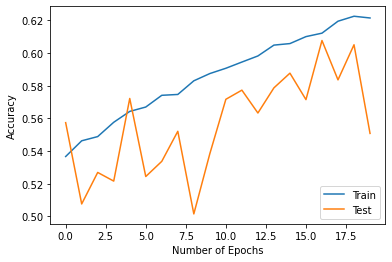

1563/1563 - 2s - loss: 1.2093 - accuracy: 0.5680 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 1.2526 - accuracy: 0.5508 - 357ms/epoch - 1ms/step
Training Accuracy:  0.5680199861526489
Test Accuracy:  0.5508000254631042


In [75]:
history = model1.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))
display_results(history, model1)

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0463 - accuracy: 0.2475 - val_loss: 1.9939 - val_accuracy: 0.2963
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7770 - accuracy: 0.3601 - val_loss: 1.8030 - val_accuracy: 0.3637
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6299 - accuracy: 0.4106 - val_loss: 1.7953 - val_accuracy: 0.3629
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5435 - accuracy: 0.4390 - val_loss: 1.5959 - val_accuracy: 0.4421
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4777 - accuracy: 0.4668 - val_loss: 1.5170 - val_accuracy: 0.4746
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4157 - accuracy: 0.4879 - val_loss: 1.3968 - val_accuracy: 0.4981
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3569 - accuracy: 0.5090 - val_loss: 1.3763 - val_accuracy:

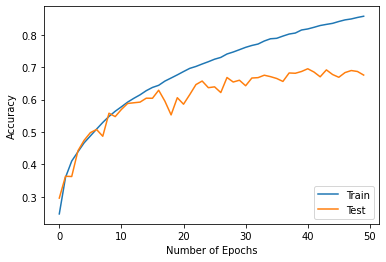

1563/1563 - 2s - loss: 0.4305 - accuracy: 0.8494 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 1.0559 - accuracy: 0.6757 - 362ms/epoch - 1ms/step
Training Accuracy:  0.8493599891662598
Test Accuracy:  0.6757000088691711


In [78]:
### CNN with 0.5 DROPOUT IN ONLY CONVOLUTIONNAL LAYERS ###
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())

model1.add(layers.Dense(256, activation='relu'))

model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(10))
sgd = optimizers.SGD(learning_rate=0.01)
model1.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))
display_results(history, model1)

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.2114 - accuracy: 0.1650 - val_loss: 2.2588 - val_accuracy: 0.1598
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0112 - accuracy: 0.2334 - val_loss: 1.9165 - val_accuracy: 0.3081
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8170 - accuracy: 0.3128 - val_loss: 1.6591 - val_accuracy: 0.3804
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6561 - accuracy: 0.3816 - val_loss: 1.4834 - val_accuracy: 0.4453
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5490 - accuracy: 0.4238 - val_loss: 1.4202 - val_accuracy: 0.4787
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4725 - accuracy: 0.4570 - val_loss: 1.3495 - val_accuracy: 0.5028
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4171 - accuracy: 0.4812 - val_loss: 1.2863 - val_accuracy:

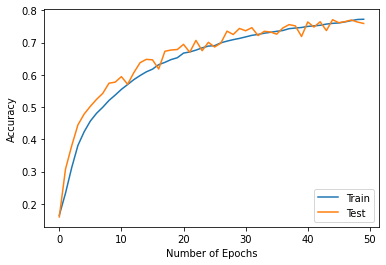

1563/1563 - 2s - loss: 0.5121 - accuracy: 0.8213 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 0.6906 - accuracy: 0.7597 - 362ms/epoch - 1ms/step
Training Accuracy:  0.8212599754333496
Test Accuracy:  0.7597000002861023


In [76]:
### CNN with 0.5 DROPOUT ONLY IN FULLY CONNTECT LAYERS ###
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(256, activation='relu'))

model1.add(layers.Dropout(0.5))

model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(10))
sgd = optimizers.SGD(learning_rate=0.01)
model1.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))
display_results(history, model1)

Epoch 1/60
1563/1563 [==============================] - 4s 2ms/step - loss: 2.1292 - accuracy: 0.2052 - val_loss: 1.8193 - val_accuracy: 0.3462
Epoch 2/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7610 - accuracy: 0.3548 - val_loss: 1.5711 - val_accuracy: 0.4131
Epoch 3/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5707 - accuracy: 0.4242 - val_loss: 1.4447 - val_accuracy: 0.4670
Epoch 4/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4583 - accuracy: 0.4634 - val_loss: 1.3285 - val_accuracy: 0.5139
Epoch 5/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3701 - accuracy: 0.5018 - val_loss: 1.3202 - val_accuracy: 0.5230
Epoch 6/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2937 - accuracy: 0.5319 - val_loss: 1.1822 - val_accuracy: 0.5730
Epoch 7/60
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2249 - accuracy: 0.5619 - val_loss: 1.1396 - val_accuracy:

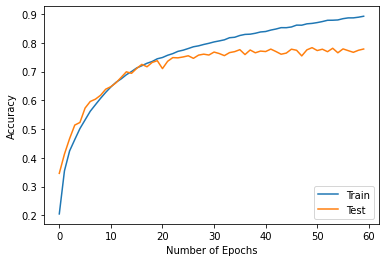

1563/1563 - 2s - loss: 0.1263 - accuracy: 0.9705 - 2s/epoch - 1ms/step
313/313 - 0s - loss: 0.7118 - accuracy: 0.7782 - 361ms/epoch - 1ms/step
Training Accuracy:  0.9704800248146057
Test Accuracy:  0.7781999707221985


In [77]:
### CNN with 0.2 DROPOUT ONLY IN FULLY CONNTECT LAYERS ###
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())

model1.add(layers.Dropout(0.2))

model1.add(layers.Dense(256, activation='relu'))

model1.add(layers.Dropout(0.2))

model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(10))
sgd = optimizers.SGD(learning_rate=0.01)
model1.compile(optimizer=sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=60, 
                    validation_data=(test_images, test_labels))
display_results(history, model1)